In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
from importlib import reload

import src.dr.spca
reload(src.dr.spca)
from src.dr.spca import Spca
from src.strats.starb_fm import StArbFm
from src.backtest import backtest
PATH = 'data'

In [20]:
df = pd.read_pickle('{}/top_500_excess_returns.pkl'.format(PATH))
spy = pd.read_pickle('{}/spy_lr.pkl'.format(PATH))

Registered SPca_alpha=0.1_252
Registered SPca_alpha=0.25_252
Registered SPca_alpha=0_252
Iteration: 500
Iteration: 1000
Iteration: 1500
Iteration: 2000
Iteration: 2500
Iteration: 3000
Iteration: 3500
Iteration: 4000
Iteration: 4500
[SPca|alpha=0.1|sp=5|cal=5|win=252    0.52
dtype: float64, array([0.01403503])]
[SPca|alpha=0.25|sp=5|cal=5|win=252    0.4
dtype: float64, array([0.04405675])]
[SPca|alpha=0|sp=5|cal=5|win=252    0.45
dtype: float64, array([0.0275472])]


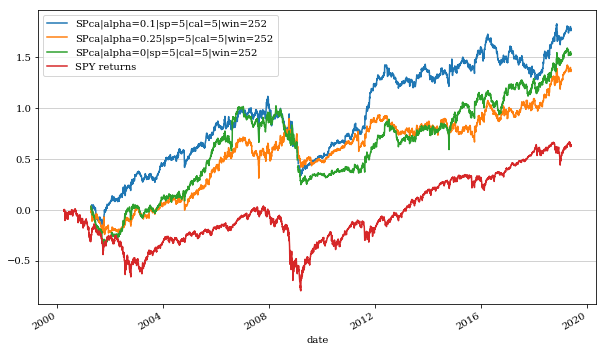

In [23]:
strats = [StArbFm(Spca(alpha=.1), cal_freq=5, span=5, window_len=252), \
          StArbFm(Spca(alpha=.25), cal_freq=5, span=5, window_len=252), \
          StArbFm(Spca(alpha=0), cal_freq=5, span=5, window_len=252)]
backtest(df, strats, benchmark=spy)

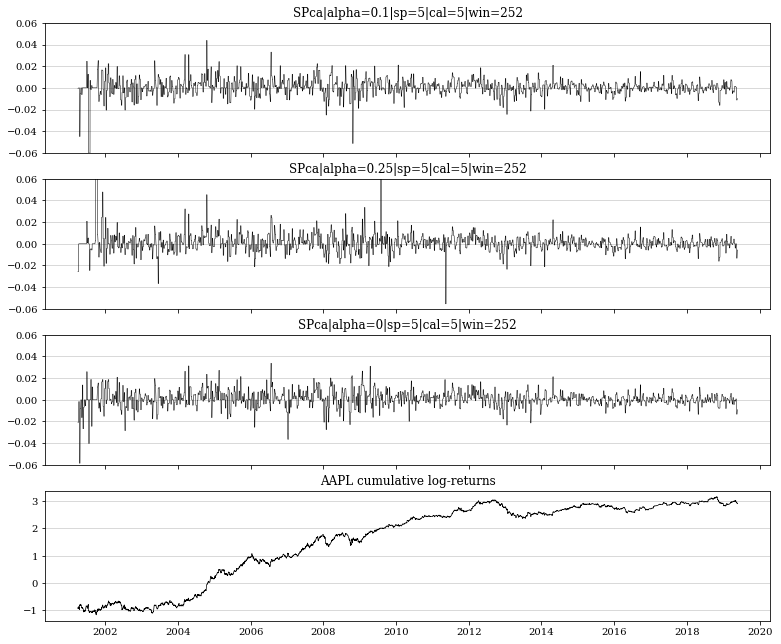

In [24]:
fig, ax = plt.subplots(len(strats) + 1, 1, sharex=True, figsize=(13, 11))
for ix, strat in enumerate(strats):
    ax[ix].set_ylim(-0.06, 0.06)
    ax[ix].plot(-1 * strat.portfolios['AAPL'], label=strat.id, c='k', linewidth=.5)
    ax[ix].grid(axis='y', alpha=.6)
    ax[ix].set_title(strat.id)
ax[-1].plot(df['AAPL'].cumsum().loc[strats[-1].trading_days], c='k', lw=.7)
ax[-1].set_title('AAPL cumulative log-returns')
ax[-1].grid(axis='y', alpha=.6)
# plt.savefig('figs/spca_aapl_resid.pdf', format='pdf', dpi=1200, bbox_inches='tight')